**Computer Vision**

It is an art of teaching a computer to have eyes. For example you can have model to decide whether or not an image is a cat or a dog - *binary classification*. 

Or maybe whether the image is of a dog, cat, or chicken - *multiclass classification*. 

Perhaps checking where an object is in an image? - *object detection*.

You can even check where different objects in an image can be seperated from each other *panoptic segmentation*.

![Display](images/03-computer-vision-problems.png "Computer Vision Examples")

**Applications of Computer Vision**

Have a phone? You already used it. Cameras and other photo apps use camera vision in enhancing and sorting images. Modern cars also use computer vision, such as those with Tesla vehicles in avoiding cars, staying in the appropriate lanes, etc. 
Manufacturers also use computer vision to identify faulty products. 

Basically, what we use our eyes for is a potential application for computer vision.

**Coverage of Chapter**

We're still going to apply all that we've learned before but adding in more 'complexities' each time. But the basic principle always stays the same. 

![Display](images/03-pytorch-computer-vision-workflow.png "How Computer Vision Works")

Specifically, we're looking at the following:

1. **Computer Vision Libraries in PyTorch** : We'll be going over built-in PyTorch computer vision libraries that can help us in working with images.

2. **Load Data** : Before we even get started, we'll always need some form of data. In this chapter we'll be using *FashionMNIST*.

3. **Prepare Data** : Once we have the images, we're going to need to prepare them. Just like in cooking. We'll load them into a PyTorch *DataLoader* so that we can use them in a training loop.

4. **Model 0 - Building Baseline** : We're working with a multiclass classification model to learn patterns in the data (images). We'll choose a loss function, optimizer, and create a training loop.

5. **Making Predictions & Evaluation Model 0** : Use the baseline model, create predictions, and evaluate these predictions.

6. **Setup Device Agnostic Code For Future Models** : We're going to have to make iterations of the baseline model so we need to cut some of the work off by shortening how we work with the device.

7. **Model 1 - Non-Linearity** : We saw the effects of having no non-linearity before and this time we'll be addding this here to see it's effects again.  We'll see if non-linearity will help improve our baseline model.

8. **Model 2 - Convolutional Neural Network (CNN)** : Here we're gonna get into some spicy new field with the introduction of the much powerful convolutional neural network architecture.

9. **Comparing Models** : By this point, we've built three different models and we're going to compare them with each other to see what works.

10. **Evaluating Best Model** : We'll be creating some predictions on random images and then evaluate the best model.

11. **Making Confusion Matrix** : In addition, we'll also be creating a confusion matrix to evaluate a classification model. This will serve as practice and a practical application of how a confusion matrix works and how it helps.

12. **Saving & Loading The Chosen Model** : Once we've done everything, we need to start saving our model and try loading it somewhere else so that we can actually work with it. 

**Computer Vision Libraries in PyTorch**

We'll be taking a look at at some PyTorch computer libraries that we should be aware of before actually writing code. This will serve as a good jumping off point to making the process a lot less confusing along the line.

**torchvision** : this module contains the datasets, model architectures, and image transformations that are vital for computer vision problems. 

**torchvision.datasets** : in this part, you can find many different datasets for a range of problems that you want to work with from image classification, object detection, image captioning, and even video classifcation + more. This also contains many base classes for making custom datasets that you want to make by yourself. 

**torchvision.models** : if you want to work with pre-trained models then you can grab one from here. This module contains well-performing and commonly used vision model architectures that are all implemented in PyTorch.

**torchvision.transforms** : when working with your dataset, you're going to need to transform them to workable data. Images get turned into numbers, processed, and even augmented. Before working with models, you'll need to work with the data first.

**torch.utils.Dataset** : simply the base dataset class for PyTorch.

**torch.utils.data.DataLoader** : this creates an iterable over a dataset. Created by calling *torch.utils.data.Dataset*

**NOTE:** *torch.utils.Dataset* and *torch.utils.DataLoader* classes are also capable of working with other types of data and not only for computer vision.

Now that those PyTorch libraries are now explained, it's time to get started by importing the dependencies needed to start working.

In [53]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

import requests
from pathlib import Path

import torchmetrics
from timeit import default_timer as timer

from tqdm import tqdm

import pandas as pd
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

**Getting Dataset**

Before working with a computer vision problem, we'll need a computer vision dataset! Can't start working without data. So, starting off with FashionMNIST. 

MNIST stands for Modified National Institute of Standards and Technology 

The original MNIST dataset consists of thousands of examples of handwritten digits from 0 to 9 - which was in one of the PyTorch tutorials mentioned before. It was used to build computer vision models in identifying postal service numbers. 

FashionMNIST is in a smiliar setup. Except for the fact that it contains grayscale images of 10 different kinds of clothing.

![Display](images/03-fashion-mnist-slide.png "What's inside FashionMNSIT")

*torchvision.datasets* contains many more examples of datasets that can be used for practicing computer vision code on. FashionMNIST is an example of those datasets. It has 10 different image classes and because of that, it is considered as a multiclassification problem. 

We'll be creating a computer vision neural network that can identify the different styles of clothing in these images a bit later on. 

PyTorch has other common computer vision datasets in the *torchvision.datasets*

This includes the FasionMNIST in *torchvision.datasets.FashionMNIST()*

First, we're going to need to download it and we provide the following parameters:

*root: str* - indicating which folder do you want to download to.
*train: bool* - this asks whether you want the train (true) or test (false) dataset. 
*download: bool* - if you want to download the data.
*transform: torchvision.transformers* - what would be the transformations to be done with the data.
*target_transform* - allowing you to transform the targets (labels) of the data.

These parameters are also available with other *torchvision* datasets. 

In [2]:
# Setting up Training Data
train_data = datasets.FashionMNIST(
    root="data", # Where to download?
    train=True, # Split train / test data?
    download=True, # Should download?
    transform=ToTensor(), # images are in PIL format - Transform to PyTorch Tensors
    target_transform=None # transform labels?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [3]:
# Check the first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

**Input & Output Shapes of a Computer Vision Model**

So we have large amount of tensors representing our image which all lead to a single value for the target (label). Let's take a look at the shape of the image


In [4]:
image.shape

torch.Size([1, 28, 28])

Breaking this down into a simpler explanation. 

The shape is : [color_channels=1, height=28, width=28]

*color_channels=1* signifies that the image is shown in grayscale. 

![Display](images/03-computer-vision-input-and-output-shapes.png "Image Shapes")

Different problems will have different input and output shapes. But the main idea will always stay the same. Turn the data into numbers, create a model to find a pattern in those numbers, and convert those patterns into something meaningful.

If *color_channels=3* then the image will be displayed in pixel values of red, green, and blue - RGB. 

The order of the shape of the tensor that we've seen just now is referred to as *CHW* (Color Channels, Height, Width). 

However, there are debates on whether an image should be represented as *CHW* which means color channels first or *HWC* which is color channels last.

In addition, you will also encounter *NCHW* and *NHWC* formats. *N* just means the number of images. For example, let's say we have a *batch_size=32*. Our tensor shape would reflect that by [32, 1, 28, 28]. We'll go deeper into *batch_sizes* further on.

PyTorch's default is usually *NCHW* - channels first for many operators. BUT PyTorch also identifies that *NHWC* - channels last performs better and is considered to be the best practice. 

Though, in our case, this wouldn't matter as much since we're dealing with a small dataset and the models that we're making are small. 

But these are some important details to keep in mind in the future.

Let's take a look at more shapes of the data that we are working with. 

In [5]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

So we are working with 60,000 training samples and 10,000 testing samples. That's quite a jump from the previous work that we were doing and considering the fact that these are images, we're really taking it up a notch. 

But you'll see that these are pretty much the same thing at the end of the day.

Let's take a look at the classes that we have. We can look at them by using the *.classes* attribute.

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Looks like we're working with 10 different types of clothes. Since we're dealing with more than just a *this or that*  then that means this is a multiclassification problem. No biggie! Let's start visualizing the data that we're working with. 

*Visualizing Data*

Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

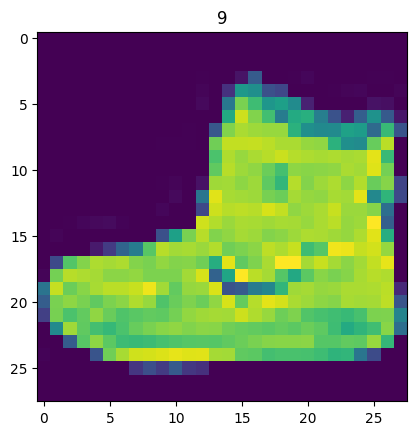

In [7]:
image, label = train_data[0] # Taking one sample from train data
print(f"Image Shape: {image.shape}") 
plt.imshow(image.squeeze()) # Image shape is [1, 28, 28]. 
# imshow needs only Height & Width so we need to do squeeze and remove the color channel
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

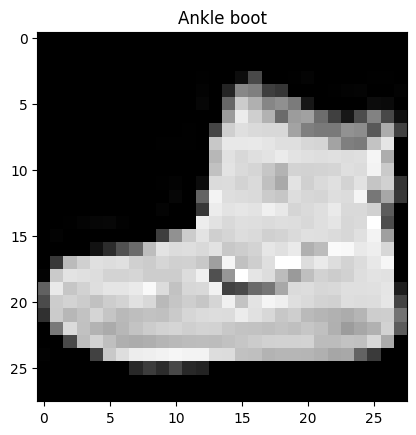

In [8]:
# If we want to grayscale the image then we can do so with adding a
# cmap parameter to plt.imshow(), as shown below
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

Let's do a couple more for other images 

In [3]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

NameError: name 'torch' is not defined

The principles that you will learn in how to build a model to address this problem will remain vital and similiar across many other computer vision problems that you will encounter. 

In essence, taking pixel values and building a model to find patterns in them to use on future pixel values. 

While we did mention that the dataset that we are working on now is quite large, it's still very small in comparison to other dataasets out there. In deep learning, 60,000 images is considered quite small. 

We could ask ourselves a question if we could create an algorithm ourselves that can identify these labels and classify them? We most likely can.

But creating a model in PyTorch and letting the machine do the work is a lot faster. Why not let the machine do the heavy lifting instead? 

**Prepare DataLoader**

Now that we have already prepared our data, it's time to create a *DataLoader*.

We'll be using *torch.utils.data.DataLoader* or *DataLoader* for short. 

From the name itself, *DataLoader* literally helps us load the data into a model. This is done for both training and inference. It allows us to create small iterable chunks of the data rather than just dumping it in one big thing. 

These 'small chunks' are called **batches / mini-batches** and is set by the *batch_size* parameter in *DataLoader*.

But, why bother doing this? Because it is computationally efficient. 

In an ideal world, you could just cram everything into one forward pass and backward pass but in reality, we are only operating with limited resources.

It's like trying to cram a square peg into a triangle hole. Unless you have infinite computing power then you can do that but typically, it's just a lot easier to break them down into batches. 

Not to mention that it gives the model more opportunities to improve. 

With mini-batches (small portions of the data), gradient descent is being performed more often per epoch because this occurs per each mini-batch as opposed to once per epoch. 

So what's a good batch size? Well this is one of those *hyperparameters* where you could set the number by yourself byt typically, 32 is a good starting point. 

But you can use any number you want. One good rule to follow is the powers of 2 so that is 32, 64, 128, 256, 512, etc. 

![Display](images/03-batching-fashionmnist.png "How Batching Works")

Let's actually start creating *DataLoader* for our training and test sets.

In [10]:
# Setting hyperparameter batch size
BATCH_SIZE = 32

# Turning datasets into iterable batches
train_dataloader = DataLoader(
    train_data, # What dataset to use
    batch_size=BATCH_SIZE, # How many samples per batch
    shuffle=True # Shuffles the samples every epoch
) 

test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # We don't need to shuffle test data since we're just 
    # using these to evaluate our model
)

# Visualizing these dataloaders. 
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of Train Dataloader: {len(train_dataloader)} Batchsize of {BATCH_SIZE}")
print(f"Length of Train Dataloader: {len(test_dataloader)} Batchsize of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001BD477AF350>, <torch.utils.data.dataloader.DataLoader object at 0x000001BD474B3530>)
Length of Train Dataloader: 1875 Batchsize of 32
Length of Train Dataloader: 313 Batchsize of 32


In [11]:
# Taking a look into the insides of a training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
# We turn train_dataloader into an iterable object and call next to get the first batch
# from the iterator that we just created.
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Let's take a look at our sample's if anything's changed after we moved them into different batches from one single large list.

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


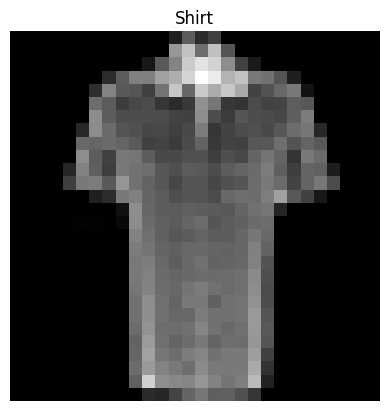

In [12]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

**Building a Baseline Model: Model 0**

Now that we have our data and also prepared it for training, we can start creating a model that we can use to train on these. 

First, subclass our baseline model to *nn.Module*.

Remember that a **baseline model** is one of the simplest model that you can imagine. No fancy tricks or anything whatsoever that you think you need to accomodate this or that. 

It's just a jumping off point to improve further iterations of the model. 

So, our baseline will consist of two *nn.Linear()* layers.

Everything's the same except for one tiny detail with the addition of *nn.Flatten()*. This is because we are working with image data and that's exactly why there's going to be an additional layer that is going to be introduced. 

To sum it all up, *nn.Flatten* compresses the dimensions of a tensor into a single vector. This is easier to visualize when done in practice. 

In [13]:
# Create a flatten layer 
flatten_model = nn.Flatten() # all nn modules function as a model and can do a forward pass 

# Get single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # Conduct forward pass 

# Print outputs
print(f"Shape Before Flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape After Flattening: {output.shape} -> [color_channels, height*width]")

Shape Before Flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape After Flattening: torch.Size([1, 784]) -> [color_channels, height*width]


So the *nn.Flatten()* took the shape from [color_channels, height, width] and converted it into [color_channels, height * width].

Why do this? 

With that change, we've turned the pixel data height and widht dimensions into just one long **feature vector**. 

That's great because *nn.Linear()* loves it when their inputs are in the form of feature vectors. 

Putting it in another way Height & Width can also be considered as Rows & Columns. When we conduct *nn.Flatten()* this creates one long feature vector but how does this look like? It's pretty simple.

Height (Rows) is the 2nd Dimension so it goes first then the Width (Columns) are in the 3rd Dimension so go last. Basically the feature vector goes through all the values of Height (Rows) and then Width (Columns).

In anycase, let's start making a model. 

In [14]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # Turning input (Height & Width) into vector (H x W)
            nn.Linear(input_shape, hidden_units, ),
            nn.Linear(hidden_units, output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

Since we now have a baseline model that we can use, let's instantiate it. 

We've setup multiple parameters so let's go over them for a bit. 

*input_shape=784*: This explains how many features that we have in the model. Since we are working with images, we're going to need one value for each pixel. Height x Width = Total Pixels. That's going to be 28x28 = 728. That's 728 features.

*hidden_units=10*: This hyperparameter is a personal choice. In this part, we'll be setting it at 10 since it's a good start.

*output_shape=len(class_names)*: Remember that we had a list of class names earlier? Since we're working with a multiclassification problem then the number of classes that we have will be the value for our output neuron. 

Now that's over, let's start insantiating our baseline model and setting it to the CPU for now. 

In [15]:
torch.manual_seed(42)

# Instantiate with parameters
model_0 = FashionMNISTModelV0(784, 10, len(class_names))

# Sending to CPU device
model_0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

**Setting up Loss, Optimizer, & Evaluation Metrics**

Since we're working with a classification problem, let's call again our *helper_functions.py* script and call *accuracy_fn()*

**NOTE**: We could also use the evaluation metrics from *TorchMetrics* instead. 

In [16]:
accuracy_fn = torchmetrics.Accuracy(task='multiclass', num_classes=len(class_names)).to('cpu')
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model_0.parameters(), lr=0.1)

**Creating a Function To Time Experiments**

With the loss, optimizer, and accuracy ready to use. It's time to start training a model. But before that, let's do a little experiment.

That is, let's try creating a timing function to see the time it takes our model to train on the CPU vs GPU. That way we can really see the difference between the two.

We'll train this model on the CPU first then on the GPU after and see what happens. 

The timing function is something that we will just import - *timeit.default_timer()* function from the Python *timeit* module. 

In [17]:
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

**Creating Training Loop & Training Model with Batches of Data**

Now that we've have everything ready to go and setup, it's time to create the training and testing loop to train and evaluate the model. 

It's pretty much the same steps as before although our data is now seperated into batches instead. So how do we go about doing this? Well, we'll just basically add another loop to loop through the data batches. 

Lookin back, our data batches are contained in our *DataLoader* which were *train_dataloader* and *test_dataloader* for the training and test data splits. 

Again, a batch is *BATCH_SIZE* samples of X (features) and y (labels), since we're dealing with a *BATCH_SIZE* of 32 then each single batch has 32 samples of images and targets.

Because we are computing on batches of data then that means our loss and evaluation metrics will also be calculated **per batch** rather than the entire dataset per epoch. 

That means that we'll have to divide our loss and accuracy values by the number of batches in each dataset's respective dataloader.

Quite a lot to take in? Let's make this into a step-by-step process.

1. Loop Through Epochs
2. Loop Through Training Batches - Perform Training Steps - Calculate Loss Per Batch
3. Loop Through Testing Batches - Perform Trainign Steps - Calculate Loss Per Batch
4. Print Loss & Evaluation Metrics
5. Timing Everything

Kinda expanded it a bit but it's nothing big if we actually put all these into code.

In [18]:
# Imports a progress bar
from tqdm.auto import tqdm

# Set seed and start timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set number of epochs - we'll set this small for faster training time
epochs = 3

for epoch in range(epochs):
    print(f"Epoch: {epoch}\n--------")
    ### Training
    total_train_loss = 0
    # Adding a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        ### Setting To Train
        model_0.train()

        ### Forward Pass
        train_pred = model_0(X)
        # Calculate Loss
        train_loss = loss_fn(train_pred, y)
        # Accumulate Loss 
        total_train_loss += train_loss 

        optim.zero_grad()
        train_loss.backward()
        optim.step()

        # Print Samples Seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide Total Train Loss by Length of Train DataLoader 
    # average loss per batch per epoch
    total_train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulating loss & accuracy
    total_test_loss, total_test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader: 
            # Forward Pass
            test_pred = model_0(X)
            # Calculate Loss Accum
            total_test_loss += loss_fn(test_pred, y)
            # Calculate Accuracy Accum
            total_test_acc += accuracy_fn(y, test_pred.argmax(dim=1))

        # Divide total loss/acc by length of dataloader - per batch
        total_test_loss /= len(test_dataloader)
        total_test_acc /= len(test_dataloader)

    ## Print Metrics
    print(f"\nTrain Loss: {total_train_loss:.5f} | Test Loss: {total_test_loss:.5f} | Test Acc: {total_test_acc:.2f}%\n")

# Calculate Training Time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

Epoch: 0
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train Loss: 0.59039 | Test Loss: 0.50954 | Test Acc: 0.82%

Epoch: 1
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train Loss: 0.47633 | Test Loss: 0.47989 | Test Acc: 0.83%

Epoch: 2
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train Loss: 0.45503 | Test Loss: 0.47664 | Test Acc: 0.83%

Train time on cpu: 35.051 seconds


**SEGWAY**:

Is *DataLoader* still a bit confusing? It'll be a lot easier to understand if we visualize it first. Since we're working with a *DataLoader* object, we can make this into an enumerate object which basically just adds a counter to each iterable so this would be what's happening:

*enumerate(train_dataloader)* -

DataLoader: [(Batch1_X, Batch1_y), (Batch2_X, Batch2_y), ...]
Ater Enumerate: [(0, (Batch1_X, Batch1_y)), (1, (Batch2_X, Batch2_y)), ...]

*for batch_index, (X, y) in ...* -

This unpacks the tuple syntax that assigns the index to *batch_index* and then applies the batch data of that index to *(X, y)*.

To sum it all up. We enumerate the train_dataloader so that we can have indexes for each batch. We assign these indexes to *batch_index* in the loop, because of this we can now then assign the data from each batch to the X and y.

Without enumeration, we really wouldn't know which batch we're working on.

**This entire process of enumerating and doing a for loop is just so that we can access the X and y from each batch that we created in the DataLoader object.**

Are you confused about the comma on the for loop? Take a look again at the structure of the enumerated object that we get. Notice how it's TWO elements? 

The index number and then the data? The comma serves as a seperator. It implies that the batch_size is assigned the index number and then the (X, y) are assigned their respective values from inside the second element.

Let's take a look at this again but this time we're just printing out each batch and the size of the X and y that are included within the batch.

In [19]:
for batch_index, (X, y) in enumerate(train_dataloader):
    print(f"Batch {batch_index}: (X)-Features Shape: {X.shape}, (y)-Labels Shape: {y.shape}")

    if batch_index == 2:
        break

Batch 0: (X)-Features Shape: torch.Size([32, 1, 28, 28]), (y)-Labels Shape: torch.Size([32])
Batch 1: (X)-Features Shape: torch.Size([32, 1, 28, 28]), (y)-Labels Shape: torch.Size([32])
Batch 2: (X)-Features Shape: torch.Size([32, 1, 28, 28]), (y)-Labels Shape: torch.Size([32])


Seems like the predictions are doing fine. It doesn't take that too long even when we were using the CPU. Quite curious what would we get if we instead used the GPU?

Let's write some code to evaluate the model.

**Creating Predictions & Get Model 0 Results**

Because of the fact that we're going to create more models to update from our baseline, it's a good idea to make it a lot easier to evaluate them by creating a general function as compared to remaking it each time.

So, we'll create a function that can take a trained mode, a *DataLoader*, loss function, and an accuracy function. 

The function will utilize the model provided to make predictions with the data in the *DataLoader* and then we evaluate the predictions with the loss and accuracy function.

We don't need an optimizer since we're evaluating! 

In [20]:
torch.manual_seed(42)

# When setting the parameters, we're specifying that they all must be the 
# corresponding datatype with the : syntax

def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            test_pred = model(X)
            loss += loss_fn(test_pred, y)
            acc += accuracy_fn(y, test_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__, # Only works when model is created by a class
        "model_loss": loss.item(),
        "model_acc": acc.item()
    }

model_0_results = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 0.8342651724815369}

**Setting up Device Agnostic Code - GPU**

With our training loop, we have seen how long it took for our CPU to calculate through 60,000 samples of images. This time, let's make a device-agnostic code for our models so that we can set them up to use CPU or GPU easily. 

In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

With that done, let's start building another model. 

**Model 1 - Building Non-linearity**

In the previous chapter, we've tackled how important non-linearity is and how much powerful a model can be with it's introduction. Let's try applying this exact same thing with the data that we're working on now. 

Before we get started, let's ask a simple question, do we even need non-linear function for our data? 

Are we okay with just having simple straight lines or do we need non-straight lines?

Let's check it out.

The model is a lot similiar as before except for the key difference is that we'll be adding *nn.ReLU()* activation functions in-between each linear layer. 

In [22]:
torch.manual_seed(42)

class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU(),
        )

    def forward(self, x: torch.Tensor):
        return self.linear_layer_stack(x)

model1 = FashionMNISTModelV1(784, 10, len(class_names))
model1

FashionMNISTModelV1(
  (linear_layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [23]:
model1.to(device)
next(model1.parameters()).device

device(type='cuda', index=0)

Looking good. We accomodated for non-linearity and already instantiated it with the same settings that we used before. In addition, we also assigned it to our device agnostic code. 

Notice how we kept the settings as is and just changed one thing - adding non-linearity. That is a standard way of conducting experiments. 

Do one thing and one thing only and then see where it goes from there. Retain the rest so that we would be able to identify that the changes are coming from this exact and only change. 

We change one thing, check, change another, check, and so on so forth. 

**Loss, Optimizer, Evaluation Metrics**

Again, we set the loss function, choose an optimizer and an evaluation metric. We can try our hand with other evaluation metrics but for now, it's best to stick with just accuracy. 

In [24]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.1)
accuracy_fn = torchmetrics.Accuracy(task='multiclass', num_classes=len(class_names)).to(device)

**Functionizing Training & Testing Loops**

We've been creating test and training loops again and again. While it was great for practice, maybe it's time to shorten this work by creating functions for these instead. 

Since we're dealing with device-agnostic code, we'll need to make sure that we have *.to(device)* feature (X) and target (y) tensors. 

For training loops, we'll create a function called *train_step()* which will take in a model, *DataLoader*, loss function, and an optimizer.

For testing loops, we'll create a function called *test_step()* which will take in a model, *DataLoader*, a loss function, and an evaluation function. 

In [25]:
def train_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_func: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn,
              device: torch.device = device):

    train_loss, train_acc = 0,0
    model.to(device)
    model.train()
    
    for batch, (X, y) in enumerate(dataloader):
        # Send to Device
        X, y = X.to(device), y.to(device)
        # Forward Pass
        train_pred = model(X)
        # Caclulate Loss
        loss = loss_func(train_pred, y)
        train_loss += loss 
        train_acc += accuracy_fn(y, train_pred.argmax(dim=1))
        # Zero Grad
        optimizer.zero_grad()
        # Backpropagation
        loss.backward()
        # Step Weights
        optimizer.step()

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.5f}")

def test_step(model: torch.nn.Module,
             dataloader: torch.utils.data.DataLoader,
             loss_func: torch.nn.Module,
             accuracy_fn,
             device: torch.device = device):

    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            loss = loss_func(test_pred, y)
            
            test_loss += loss
            test_acc += accuracy_fn(y, test_pred.argmax(dim=1))

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        print(f"Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.5f}")

Since we have made our training loop into functions, we won't have to redo everything again from scratch and just call these functions instead! 

We'll call these inside a loop for each epoch. That way for each epoch, we have a training step and a testing step. We can customize how often we want to do a testing step, sometimes it's every 5 epochs or 10. But for now, we'll do it fo each epoch.

In addition, we will also time our entire process so that we can see how fast it is in the GPU. 

In [26]:
torch.manual_seed(42)

# Measure Time
train_time_start_on_gpu = timer()
epochs = 3

# tqdm is a library for progress bar
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(model1, train_dataloader, loss_fn, optimizer, accuracy_fn)
    test_step(model1, test_dataloader, loss_fn, accuracy_fn)

train_time_end_on_gpu = timer()
total_train_time_model1 = print_train_time(train_time_start_on_gpu,
                                          train_time_end_on_gpu,
                                          device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 1.09199 | Train Accuracy: 0.61343
Test Loss: 0.95636 | Test Accuracy: 0.64996
Epoch: 1
---------
Train Loss: 0.78101 | Train Accuracy: 0.71928
Test Loss: 0.72227 | Test Accuracy: 0.73912
Epoch: 2
---------
Train Loss: 0.67027 | Train Accuracy: 0.75937
Test Loss: 0.68500 | Test Accuracy: 0.75020
Train time on cuda: 54.703 seconds


Seems like our model is training! We can see that the loss is decreasing and the accuracy increasing for both test and and training sets. But.. the time spent is higher than that of the CPU?

Let's get a bit deeper into the explanations. For the most part, one of the biggest factors that can affect the speed is the quality of the CPU/GPU that is being used. But still, a GPU should be better than a CPU still, correct?

Well, one reason that the CPU could be faster is that the dataset and the model itself are so small (like our current dataset) that the benefits of using a GPU is lessened by the fact that it will take longer for the data to be transferrred there. 

There exists a bottleneck between copying the data from CPU to GPU so the benefits of GPU on a small dataset is so negligable that it actually takes longer to copy the data to GPU memory.

Meaning that if we're working with a smaller dataset such as ours then a CPU would be optimal in handling the data. 

However, for larger datasets and models, the speed of a GPU will always outweigh the cost of getting the data there from the CPU.

But still, it's always good to experiment around with what hardware is best for you to train in. 

Let's start evaluating the *model1* with the *eval_model()* function and see how it works. 

In [27]:
%%script echo skipping
torch.manual_seed(42)

# This will cause an error!
model1_results = eval_model(
    model1,
    test_dataloader,
    loss_fn,
    accuracy_fn
)

model1_results

Couldn't find program: 'echo'


Oops? an error with the same device. That's because our data and our model are located in the GPU. However, when it comes to our evaluation function then we haven't really made in device agnostic.   

We'll need to modify our evaluation function by passing a *target* device parameter to our *eval_model()* function. Then we can start calculating the results again.

In [28]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device
              ):
    
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            eval_preds = model(X)
            loss += loss_fn(eval_preds, y)
            acc += accuracy_fn(y, eval_preds.argmax(dim=1))

        loss /= len(dataloader)
        acc /= len(dataloader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc.item()
    }

model_1_results = eval_model(model1, test_dataloader, loss_fn, accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 0.7501996755599976}

In [29]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 0.8342651724815369}

Seems like adding non-lineariy made the model worse? If we take a look at the baseline and the results of our non-linear iteration then the baseline seems to perform better. 

That's something that you should always take into consideration. The things that you expect to work out fine, might actually not turn out fine. 

The solution that you tried or the feature that you checked out for a different case might not work in this case. Many more instances such as that. 

Expect the unexpected. It's part art and part science.

Seems like the model is **overfitting** on the training data.  

What does that mean? Remember how our model is made to recognize patterns? Well what happens if we keep letting our model learn our training data? Once the model has already recognized patterns, what happens if we don't stop and keep learning? 

Would it retain these recognized patterns? Nope, it'll keep learning. That means, eventually it learned all the patterns of the sample to the point that it doesn't recognize patterns anymore, it has *memorized* the sample itself. 

That means it's no longer trying to find shoes, it's instead trying to find THIS specific shoe that it was overtrained on. So if you try to input another shoe of a different type, you'll have a pretty bad result because while it is still a shoe, it's not the EXACT shoe that the model has been trained on.

That's BAD! Overfitting is BAD!

So, how do we go about fixing this problem? There are two ways:

1. Using a smaller or different model - some models can fit certain kinds of data better than others.

2. Using a larger dataset - more data means more chances that a model can recognize generalized patterns.

However, there's plenty of other means of fixing this. These are just some that you can do. The rest is up for us to try and explore. 

### RESEARCH 

3. Reduce the number of neurons - simplifying the model
   
4. Utilize early stopping - apply a validation set -> once loss stops decreasing after a certain number of epochs -> training is halted 

**Model 2 - Building Convolutional Neural Network (CNN)**

Let's get introduced into another new topic. 

Welcome to the world of Convolutional Neural Networks (CNN or ConvNet)!

CNNs are highly regarded for their capabilities in finding patterns for visual data. Since we're dealing with visual data right now, let's check it out and see if it can pose as an improvement from our baseline. 

So going over again the usual we have *Input -> Output Layers*. With CNN it changes over to this

*Input Layer -> [Convolutional Layer -> Activation Layer -> Pooling Layer] -> Output Layer*

Wherein the contents of [Convolutional Layer -> Activation Layer -> Pooling Layer] can be upscaled and repeated multiple times depending on the requirements. 

With this said, it begs the question: **What Model Should I Use?** It's a good question.

There are many different types of models to choose so let's take a quick look at them. Typically, you can split them into problem types:

**Problem:** Structured data (spreadsheets, row and column data) | **Models ->** *Gradient Boosted Models / Random Forests / XGBoost*
**Problem:** Unstructured data (images, audio, language) | **Models ->** *Convolutional Neural Network / Transformers*

Pretty simple when it comes to choosing what should you use. But we've taken enough time talking about concepts and learning new things. It's time to put them into practical use. We'll take what we've learned from the *CNN Explainer* site and implement it to our own model.

Let's leverage the *nn.Conv2d()* and *nn.MaxPool2d()* layers from *torch.nn* as these function the same thing as the layers that we've seen in the website.

![Display](images/03-cnn-explainer-model.png "CNN-Explainer Site")

In [86]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels = input_shape, 
                out_channels = hidden_units, 
                kernel_size = 3,   # kernel_size determines how big the square is so 3 will be 3x3
                stride = 1,    # stride = 1 is default
                padding = 1),    # padding has "valid" (no padding) "same" (output has same shape as input) or "int" for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3, 
                      stride = 1, 
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
            # default stride value for MaxPool is the same as kernel_size
        )
        self.block_2 = nn.Sequential(
            # We specify padding here otherwise it would be taken as stride instead. 
            # Remember the parameters: [input, output, kernel_size, stride, padding]
            
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape) - this outputs [32, 10, 7, 7]
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

Let's start explaining some things that are bit confusing here. In the case of the classifier where we specify the output in *nn.Linear()* with *hidden_units*7*7*, how does that exactly work? Well, it has mostly to do with knowing the output from our last pooling layer . Remember that our MaxPool layers have a stride of 2? That means we are minimizing the size of our inputs by 2 - halving the size. 

So originally we had 28x28 as our size for the image in the MNIST Dataset. We go through the first block of convolution which reduces it down to 14x14 and then another block which further puts it down to 7x7 - meaning we reduced the size to 1/4 of it's original value. But most importantly, this is the final output from our convolution. 

When we start classifying and connecting to linear layers, we need to specify this feature map output. So our *self.block_2* has an output of *hidden_units* from it's most recent *nn.Conv2d* and then also has an output feature map of *7x7* from *nn.Maxpool2d(2)*. We use these two outputs from *self.block_2* to input in *nn.Linear()*'s in_features. This is done after flattening. 

To reitirate we took *hidden_units* from *nn.Conv2d* and we took *7x7* from *nn.MaxPool2d(2)*.

Still not getting it? Let's try another perspective. 

In our model, we've specified that our *hidden_units* is 10. We have an output from our last pooling layer of *7x7* feature map's. Doing *nn.Linear(hidden_units*7*7)* is basically saying that we have 10 (7x7) feature maps that we need to input into our *nn.Linear()*. 

**Stepping Through nn.Conv2d()**

Quick overview again over the two new layers that we added:

1. *nn.Conv2d()* - also known as a convolution layer
2. *nn.MaxPool2d()* - also known as a max pooling layer

What does '2d' mean exactly? It's 2-dimensional data. As in, our images have two dimensions which are height x width. Of course, there is also a dimension for color channels but each of the color dimension also has two dimensions: height x width. There exists other dimensional data such as 1D for text and 3D for objects and so we also have *nn.Conv1d()* & *nn.Conv3d()*

Let's try out the layers with some toy data. 

In [75]:
torch.manual_seed(42)

# Creating sample batch with random numbers with the same size as an image batch
images = torch.randn(size=(32, 3, 64, 64)) # [Batch Size, Color Channels, Height, Width]
test_image = images[0] #Taking one image for testing
print(f"Image Batch Shape: {images.shape} -> [Batch Size, Color Channels, Height, Width]")
print(f"Single Image Shape: {test_image.shape} -> [Color Channels, Height, Width]")
print(f"Singe Image Pixel Values: \n{test_image}")

Image Batch Shape: torch.Size([32, 3, 64, 64]) -> [Batch Size, Color Channels, Height, Width]
Single Image Shape: torch.Size([3, 64, 64]) -> [Color Channels, Height, Width]
Singe Image Pixel Values: 
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

Going deeper into *nn.Conv2d()* and it's various parameters:

1. *in_channels* (int) - number of channels in the input image
2. *out_channels* (int) - number of channels produced by the convolution
3. *kernel_size* (int/tuple) - size of the convolving kernel / filter
4. *stride* - (int/tuple) - steps taken by the kernel - default: 1
5. *padding* - (int/tuple/str) - adds padding to all four sides of input - default: 0

![Display](images/03-conv2d-layer.gif "Convolution Layer")

What happens when we play around with the hyperparameters of a *nn.Conv2d()* layer

In [76]:
torch.manual_seed(42)

# Creating a convolutional layer with the same dimensions as TinyVGG
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=0) # Can use "valid" or "same" here
conv_layer(test_image)

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

When working with previous versions of PyTorch - notably around 1.11.0 and before then it is required that the *nn.Conv2d()* layer has a 4-dimensional tensor as an input - (N, C, H, W) - Batch Size, Color_Channels, Height, Width. 

You would need to unsqueeze an individual image in order to make it 4-dimensional so that you can pass it into *nn.Conv2d()* but nowadays, it will work with just a 3-dimensional tensor - (C, H, W).

So, we'll pass the image again into the convolusion layer but this time, we'll check out it's shape once it's outputted. 

In [77]:
conv_layer(test_image).shape

torch.Size([10, 62, 62])

Seems like that the number of channels that we have changed. From 3 to 10. Not to mention that our pixel sizes also changed from 64 - 62. 

Time to experiment. Try changing the hyperparameter values of *conv_layer* and see what happens.

In [78]:
torch.manual_seed(42)

conv_layer_2 = nn.Conv2d(
    in_channels = 3, # Same number of color channels as input
    out_channels = 10,
    kernel_size = (5,5), # Works for both int and tuple since a kernel is usually a square
    stride = 2, 
    padding = 0
)

conv_layer_2(test_image).shape

torch.Size([10, 30, 30])

Now we get different values. Our shape changed from [10, 62, 62] into [10, 30, 30]. These values will keep changing if you use different values. Our previous settings were [3, 10, 3, 1] and now [3, 10, 5, 2]. So we changed the kernel_size from 3 to 5 and the stride from 1 to 2. Just with those 'little' changes we got drastically different values.

But let's hold back for a minute and think - what's really going on here?

Behind the scenes, *nn.Conv2d()* is basically compressing the information stored in the image. It conducts operations on the input (test image) based it's internal parameters.

The concept relatively stay's the same as is with many other neural networks that we've built.

Data goes in and then the layer tries to update their internal parameters (patterns) to lower the loss functions with the help of an optimizer. The only difference is **how** the different layers calculate their parameter updates or in PyTorch terms, the operation present in the layer *forward* method. So filters are calculated differently from regular weights.

It's not that different! If we take a look at the inside of convolutional layer by calling *conv_layer_2.state_dict()* we'll see a what looks like a weight and bias setup. It's all the same, just that the terms are different in convolusion - kernel / kernel weights / filter because they are operated differently from regular weights.

In [79]:
print(conv_layer_2.state_dict())

OrderedDict({'weight': tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],


Bunch of random numbers for a weight and bias tensor. Exactly the same! These shapes are then manipulated by the inputs we passed ito *nn.Conv2d()* when we set it up. Let's take a look at these.

In [80]:
# Get shape of weight & bias tensors within conv_layer_2

print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"conv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]
conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


So that leaves us with the biggest question of all - how do we know what parameters to set in our *nn.Conv2d()* layers?

Again, we go back to the creative part of machine learning. These values aren't set in stone and we don't know what to set. These are hyperparameters so at this point, it's just best to experiment around and think of logical possibilities when choosing. Check out different values and see how they turn out and affect the model's performance. 

We're working with different and quite frankly, exciting new layers that introduce many complexities but at the end of the day, the same princpiple stay's the same. We are initializing with random numbers then update them to better represent data. That's it. 

**Stepping Through nn.MaxPool2d()**

Let's move the data through *nn.MaxPool2d()*

In [81]:
# Print original image shape 
print(f"Test image original shape: {test_image.shape}")

# Create sample nn.MaxPool2d() Layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through convolution layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through maxpool layer
test_image_through_conv_and_maxpool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_maxpool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Shape after going through conv_layer(): torch.Size([10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([10, 31, 31])


Keep note of the changes with the shapes that are happening in and out of *nn.MaxPool2d()* layer. The *kernel_size* of the *nn.MaxPool2d()* layer drastically affects the size of the output shape. This technically halves the entire image from a 62x62 to 31x31 image. 

Let's try working with an even smaller tensor.

In [82]:
torch.manual_seed(42)
# Create random tensor toy with similiar number of dimensions to an image
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random Tensor: \n{random_tensor}")
print(f"Random Tensor Shape: {random_tensor.shape}")

# Create maxpool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Passing random tensor to maxpool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor}") # <-- MaxPool takes the largest value of an area
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random Tensor: 
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random Tensor Shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


Take a look at the shapes of *random_tensor* and *max_pool_tensor*. The values change from [2,2] into [1,1]. Essentially they also got halved as the same as our previous example. 

Is it always like that? No. It entirely depends on the hyperparameter values that you set with *kernel_size* from *nn.MaxPool2d()*

Also take note that the value that's left in *max_pool_tensor* is the highest value from *random_tensor*. So why? Why is it choosing the highest value and throwing away the rest? 

This is another concept that you should understand when it comes to neural networks.

**Every layer in a neural network is trying to compress data from higher dimensional space to lower dimensional space**.

Basically, we take a lot of numbers (raw data) and then learn the patters in those numbers, these patterns should be predictive while also being smaller in size than the original values. Take it another way, you can consider the whole purpose of neural networks is to *compress information*.

![Display](images/03-conv-net-as-compression.png "Neural Network is Compression")

This means that from how a neural network looks at things, compression is equivalent to intelligence. 

That is the concept behind *nn.MaxPool2d()* layer. This takes the maximum value from a portion of a tensor and disregards the rest as meaningless details. 

We are retaining only the important information and features that we should consider and the rest shouldn't be kept in mind. Convolution and pooling layers are choosing what we need to recognize the patterns only in order to improve efficiency and reduce the cost.

The same concept happens with *nn.Conv2d()* but the only difference is that it isn't taking the maximum value but insteads performs a convolution operation instead to see the data. 

*nn.MaxPool2d* is just one pooling layer that we can use. There are others such as *nn.AvgPool2d()*. You can already probably guess with the name of what it's supposed to do. 

In [83]:
torch.manual_seed(42)
# Create random tensor toy with similiar number of dimensions to an image
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random Tensor: \n{random_tensor}")
print(f"Random Tensor Shape: {random_tensor.shape}")

# Create maxpool layer
avg_pool_layer = nn.AvgPool2d(kernel_size=2)

# Passing random tensor to average pool layer
avg_pool_tensor = avg_pool_layer(random_tensor)
print(f"\nAverage pool tensor:\n{avg_pool_tensor}") # <-- average pool takes all the values and calculates the average as the output
print(f"Average pool tensor shape: {avg_pool_tensor.shape}")

Random Tensor: 
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random Tensor Shape: torch.Size([1, 1, 2, 2])

Average pool tensor:
tensor([[[[0.2326]]]])
Average pool tensor shape: torch.Size([1, 1, 1, 1])


**Setting a Loss Function & Optimizer For Model_2**

We've been talking about the newly introduced layers for our first CNN enough. If it's still all a bit too hard to grasp just start from small and work your way up from there. Pick a model, pass some data, and just observe whatever happens.

Aside from that, let's get moving and start training. 

We first have to create our loss function and optimizer. As usual, *nn.CrossEntropyLoss* is a good loss function to use since we're working with multiclassification data. For the optimizer, *torch.optim.SGD()* is solid to optimize the *model_2.parameters()* and the learning rate will be maintained at 0.1.

In [84]:
# Setting up loss & optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), 0.1)

**Training & Testing Model_2 with Existing Training & Testing Functions**

Remember that we already created our testing and training functions earlier so we don't really need to make them again from scratch. We just have to call them. Let's do just that. Everything is pretty much still the same.

In [89]:
torch.manual_seed(42)

train_time_start_model_2 = timer()

epochs = 3 
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------")
    train_step(
        dataloader=train_dataloader,
        model=model_2,
        loss_func=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )

    test_step(
        dataloader=test_dataloader,
        model=model_2,
        loss_func=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(
    start=train_time_start_model_2,
    end=train_time_end_model_2,
    device=device
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train Loss: 2.30229 | Train Accuracy: 0.10000
Test Loss: 2.30231 | Test Accuracy: 0.09994
Epoch: 1
--------
Train Loss: 2.30228 | Train Accuracy: 0.10000
Test Loss: 2.30231 | Test Accuracy: 0.09994
Epoch: 2
--------
Train Loss: 2.30228 | Train Accuracy: 0.10000
Test Loss: 2.30231 | Test Accuracy: 0.09994
Train time on cuda: 73.772 seconds


Seems like our convolutional neural network is off to a great start! Things have improved quite a bit. Let's try evaluating it.

In [42]:
model_2_results = eval_model(
    model_2,
    test_dataloader,
    loss_fn,
    accuracy_fn
)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32413312792778015,
 'model_acc': 0.8837859034538269}

**Comparing Models & Training Time**
So far, we've trained three seperate models:

1. *model_0* - baseline model with two *nn.Linear* layers.
2. *model_1* - accomodates for non-linearity with *nn.ReLU* in between the linear layers.
3. *model_2* - CNN model that mimics TinyVGG's architecture. Containts two blocks of convolutional & pooling layers.

Creating multiple models and comparing them is a regular thing when it comes to machine learning and you should do the same since this allows you to also practice with creating different types of models. Basically, we create different models to see which works best. You can't know if you don't make them in the first place. 

Let's combine all these evaluation results into one DataFrame object. Great thing is that we have pandas library to work with to make it a lot more visually pleasing. 

In [43]:
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,0.834265
1,FashionMNISTModelV1,0.685001,0.750200
2,FashionMNISTModelV2,0.324133,0.883786


It seems like our CNN model_2 is the best-performing model out of all the 3 with the model_0 baseline containing only linear layers following suite and model_1 containing non-linear activation functions at last place. 

**Performance-Trade Speedoff**

One of the most key important elements when it comes to training is realizing the tradeoffs that you get. For the most part, you tend to get better performance with results from larger and complex networks. It's simple. The more neurons, layers, and etc. means more room for patterns to be memorized and used. 

However, the better the performance of your model means the suffering of training and inference speed increases exponentially. 

But for the most part, it all depends on the hardware that is being utilized. The more CPU/GPU cores that you have, the faster the training process goes and the newer generation hardware that you have means even faster training. But that's expensive. 

Let's take our current models and visualize their accuracies.

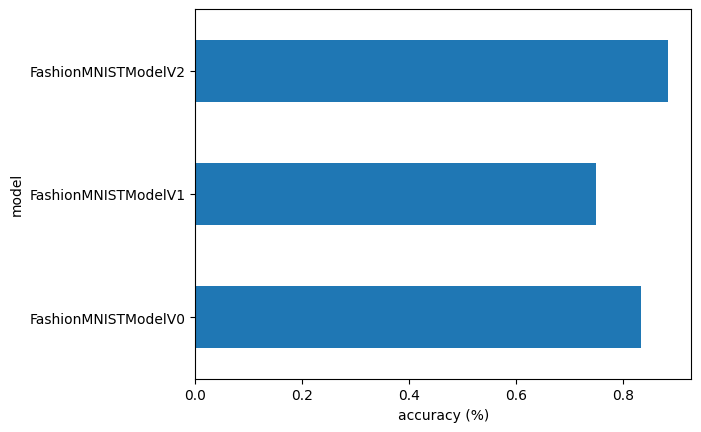

In [44]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

**Make & Evaluate Random Predictions From Best Model**

Now that we've realized our best-performing model, it's time we evaluate it. Let's create a function *make_predictions* in which we can pass data into the model for it to predict on.

In [45]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Model requires 4D Tensor
            sample = torch.unsqueeze(sample, dim=0).to(device)
            # Forward Pass into Model (Creates Logits)
            pred_logit = model(sample)
            # Get Prediction Probability / Our batch has 1 sample so we can perform on dim=0 
            # because squeezing means that from [batchsize, features] it turns into [features] 
            # thats why we can do dim=0
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            # Transfer Prediction Probabilty from GPU to CPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into tensor
    return torch.stack(pred_probs)

In [46]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape & label
print(f"Test Sample Image Shape: {test_samples[0].shape}\nTest Sample Image Label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test Sample Image Shape: torch.Size([1, 28, 28])
Test Sample Image Label: 5 (Sandal)


Let's utilize our newly created function to predict on *test_samples*

In [47]:
# make predictions on test samples with model_2
pred_probs = make_predictions(model_2, test_samples)
pred_probs[:2]

tensor([[2.6594e-08, 7.0735e-09, 2.1130e-08, 1.9016e-08, 3.1013e-09, 9.9996e-01,
         1.3105e-08, 5.1918e-06, 1.1983e-05, 2.4420e-05],
        [1.0249e-01, 5.9669e-01, 5.5579e-03, 1.2535e-01, 9.5014e-02, 7.2098e-04,
         7.3458e-02, 3.8781e-04, 1.1076e-04, 2.3330e-04]])

Now that we have our prediction probabilities then we can start working on transforming these into prediction labels by just taking out the maximum value from *torch.softmax()* with *torch.argmax()* activation function.

In [48]:
# Remember argmax take's the ARGUMENT LOCATION of the highest value
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [49]:
# Let's take a look if our predictions follow the same form as our test labels
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

Seems like they're both the same format! Meaning that we can now identify labels properly and can compare them. 

We're dealing with images so why should we just stick to arbitrary numbers? We should stay the same form as the data that we're dealing with! That means we ----- VISUALIZE! VISUALIZE! VISUALIZE! 

Time to go back to our favorite visualizer - matplotlib.

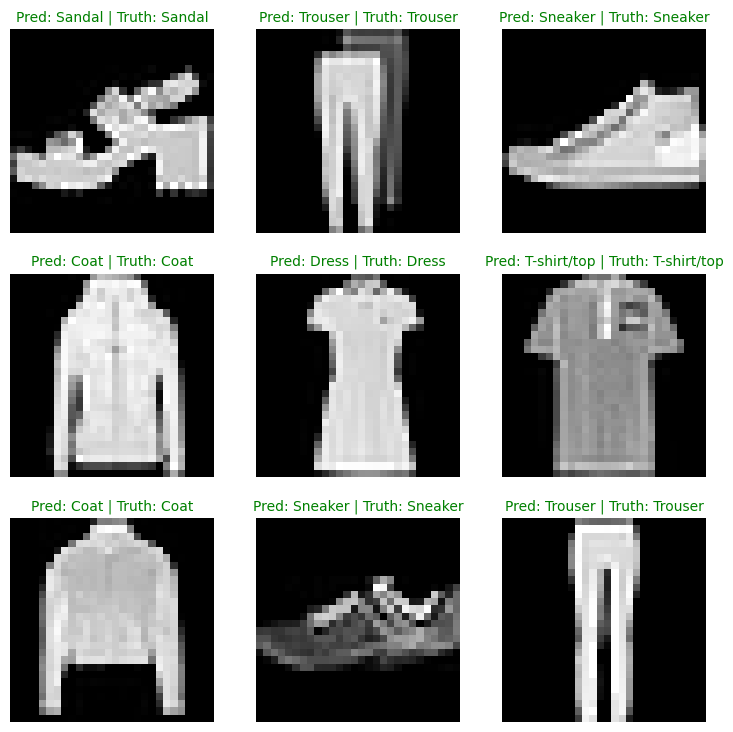

In [51]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create a subplot
    plt.subplot(nrows, ncols, i+1)
    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")
    # Finding the prediction label (in text form, e.g. "Sandal")
    pred_label = class_names[pred_classes[i]]
    # Get the truth label (in text form e.g "T-shirt")
    truth_label = class_names[test_labels[i]]
    # Create the title text of the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    # Check for equality and change title colour accordingly
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")
    plt.axis(False);

Now that is some beautiful visualization! Not only is it pleasing to look at but it is also easy to understand that we did a good job. 

**Confusion Matrix for Further Prediction Evaluation**

There are plenty of different evaluation metrics that is possible to use when it comes to classification problems but one of the easiest and visualizing is a confusion matrix. 

You're no stranger to evaluation metrics, we've already been using it by the use of accuracy, but there's plenty more!

Confusin matrix is exactly what it means, we are able to distinguish where our classification gets confused between predictions and true labels. 

Let's try making one. First we'll count the steps:

1. Make predictions with our trained model - *model_2* (confusion matrix compares prediction to true labels).
2. Make confusion matrix using *torchmetrics.ConfusionMatrix*.
3. Plot confusion matix using *mlxtend.ploting.plot_confusion_matrix()*.

Let's start working by first creating predictions with a trained model. 

In [87]:
from tqdm.auto import tqdm

# Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making Predictions"):
        # Send data and targes to target device
        X, y = X.to(device), y.to(device)
        # Forward pass
        y_logits = model_2(X)
        # Turn predictions from logits -> prediction probabilities -> prediction labels
        # Notice we're not squeezing anymore? It's because our batchsize is now 32 instead of 1 
        # so squeezing isn't going to do anything anymore and we have to specify dim=1 because
        # [batch_size, features] remains intact as the shape.
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
        y_preds.append(y_pred.cpu())

# Concatenate lists of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making Predictions:   0%|          | 0/313 [00:00<?, ?it/s]

Since we've got predictions, it's time to go through steps 2 & 3: 

2. Make a confusion matrix using *torchmetrics.ConfusionMatrix*
3. Plot confusion matrix using *mlxtend.plotting.plot_confusion_matrix()*

Make sure you have *torchmetrics* and *mlxtend* installed since these two libraries will help along with making a visual confusion matrix. 

First we need to work with creating a *torchmetrics.ConfusionMatrix* instance. We need to tell it exactly how many classes we are currently working with. Setting it by *num_classes=len(class_names)*.

Then we can start creating a confusion matrix (in tensor format) by passing our model's predictions in the our confusion matrix instance. We do this by inserting the predictions to *preds=y_pred_tensor* and with the targets *target=test_data.targets*

Then we plot our confusion matrix with *plot_confusion_matrix* from *mlxtend.plotting*

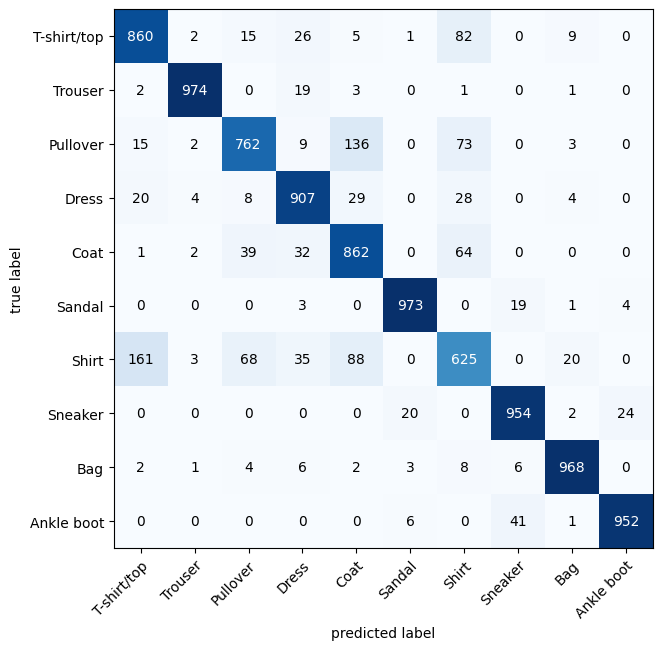

In [56]:
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds = y_pred_tensor, target = test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # We convert the tensor to NumPy arrays since Matplotlib
    class_names = class_names,
    figsize = (10,7)
)

That looks amazing! We can see where our model gets confused on what label with which prediction. From the graph, we can realize that our model is doing pretty well since the majority of the values are located diagonally from top to bottom. That means that it's predicting a good percentage of our data correctly. 

Ideally, it'll be better if all the other grids are 0 and only in the diagonal grid are the values located but that's asking for a 100% accuracy for the model. 

We can see that the model gets confused the most with items that are close to each other. For example, it often gets confused by pullover and coats. 

This visualization and matrix offers a lot of clarity and help as compared to just regular accuracy because we are able to distinguish where and what the model gets wrong. It also hints as to why it is getting things wrong. 

It's quite understandable to be confusied with "shirts" and "T-shirt". With these newly added information, we could do more on adjusting the model or even our data to even better represent them.

In [ ]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create a subplot
    plt.subplot(nrows, ncols, i+1)
    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")
    # Finding the prediction label (in text form, e.g. "Sandal")
    pred_label = class_names[pred_classes[i]]
    # Get the truth label (in text form e.g "T-shirt")
    truth_label = class_names[test_labels[i]]
    # Create the title text of the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    # Check for equality and change title colour accordingly
    if pred_label != truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")
    plt.axis(False);

**Save & Load Best Performing Model**

We'll be finishing everything off by saving and loading the best performing model. Recall that we can use the following to save a PyTorch model:

1. *torch.save* - function to save a whole PyTorch model or model's *state_dict()*
2. *torch.load* - function to laod a saved PyTorch object
3. *torch.nn.Module.load_state_dict()* - a function to load a *state_dict()* into an existing model instance.

Let's save our *model_2*'s *state_dict()* - load it back and then evaluate it to make sure that we're doing everything right.

In [65]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if req
                exist_ok=True # if directory exists, skip error
                )

MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving Model To: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
          f=MODEL_SAVE_PATH)

Saving Model To: models\03_pytorch_computer_vision_model_2.pth


We've saved the model's *state_dict* and now we can load it back up to a new instance by a combination of *load_state_dict* and *torch.load*

Since we're using *load_state_dict*, we first need to create an instance of *fashionMNISTModelV2()* with the same input parameters as our saved model's  *state_dict()*

In [81]:
MODEL_SAVE_PATH

WindowsPath('models/03_pytorch_computer_vision_model_2.pth')

In [83]:
loaded_model_2 = FashionMNISTModelV2(1, 10, 10)
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2 = loaded_model_2.to(device)

We now have a loaded model based on our *model_2*'s original trained parameters. Let's check it out with *eval_mode* to see if
everything works as similiar as it was before.

In [85]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    dataloader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

# Let's check if these results are the same as model_2's original results
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32413312792778015,
 'model_acc': 0.8837859034538269}

In [86]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32413312792778015,
 'model_acc': 0.8837859034538269}

Seems close enough but there's another way that we can look at this by using *torch.isclose()* and passing a certain tolerance level via the parameters *atol* (absolute tolerance) and *rtol* (relative tolerance).

If the model's results are close then the output of the *torch.isclose()* should be a boolean - true. 

In [87]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
             torch.tensor(loaded_model_2_results["model_loss"]),
             atol=1e-08,
             rtol=0.0001)

tensor(True)